### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



Download and extraction complete!
Number of classes: 200
Number of samples: 100000


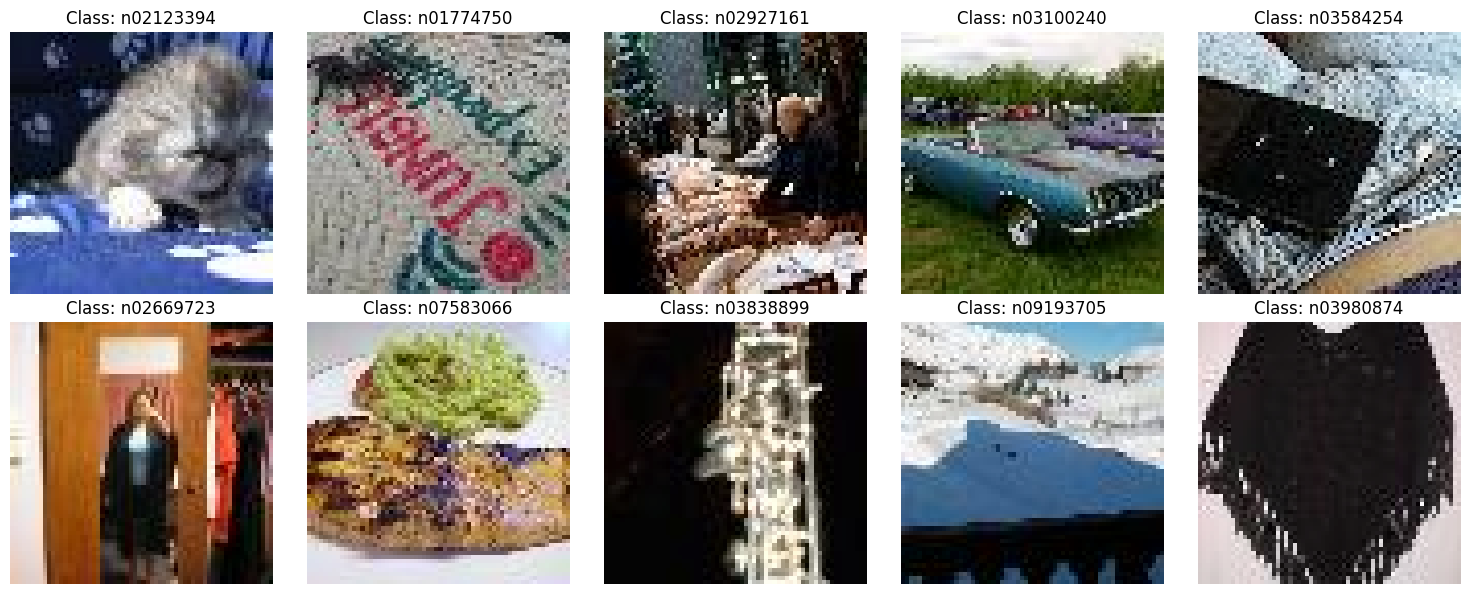

In [4]:
# Import necessary libraries
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO       #Imports libraries needed for requesting the file over HTTP
import numpy as np

# Define the path to the dataset
dataset_path = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'  # Replace with the path to your dataset

# Send a GET request to the URL
response = requests.get(dataset_path)      ##HTTP Requests. How Python fetches web resources.
# Check if the request was successful
if response.status_code == 200:
    # Open the downloaded bytes and extract them
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/dataset')                   #unzip them to dataset directory
    print('Download and extraction complete!')

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),               ## Converts H * W * C image format to PyTorch's C * H *W tensor format and scales pixels to $[0, 1]$.
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset
tiny_imagenet_dataset_train = ImageFolder(root='/dataset/tiny-imagenet-200/train', transform=transform)
tiny_imagenet_dataset_test = ImageFolder(root='/dataset/tiny-imagenet-200/test', transform=transform)

# Create a DataLoader
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=32, shuffle=True)
dataloader_test = DataLoader(tiny_imagenet_dataset_test, batch_size=32, shuffle=False)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes)
num_samples_train = len(tiny_imagenet_dataset_train)
num_samples_test = len(tiny_imagenet_dataset_test)

# Print the results
print(f'Number of classes: {num_classes}')
print(f'Number of samples in train: {num_samples_train}')
print(f'Number of samples in test: {num_samples_test}')

# Function to denormalize image for visualization        #Reverses the normalization process
# You must reverse normalization to plot the image correctly. The reverse process must also handle the dimension change: H*W*C.
def denormalize(image):
    image = image.to('cpu').numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

# Visualize one example for each class for 10 classes

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
classes_sampled = []
found_classes = 0
target_classes = 10


for inputs, classes in dataloader_train:
    for img, cls in zip(inputs, classes):
        cls_int = cls.item()

        # Check if we need this class and haven't sampled 10 yet
        if cls_int not in classes_sampled and found_classes < target_classes:

            # Find the correct subplot position (row and column)
            # Targeted VisualizationSetup Plot Grid: Initialize a visual container (the figure) and a grid of sub-containers (subplots)
            row = found_classes // 5
            col = found_classes % 5

            # Denormalize the image before plotting
            img_to_plot = denormalize(img)   ##img should be go thorgh denirmalization to be plotted

            # Plot the image and set the title
            axes[row, col].imshow(img_to_plot)
            class_name = tiny_imagenet_dataset_train.classes[cls_int]
            axes[row, col].set_title(f'Class: {class_name}')
            axes[row, col].axis('off')

            # Update counters
            classes_sampled.append(cls_int)
            found_classes += 1

            # Stop if 10 classes have been found
            if found_classes == target_classes:
                break

    # Stop the outer loop once 10 classes are sampled
    if found_classes == target_classes:
        break


plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

In [5]:
print(f'Number of samples in test: {num_samples_test}')

Number of samples in test: 10000
